In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('深圳地铁轨道数据6.30-7.9.xlsx')
df = df[~df['测点编号'].isin(['kz1', 'kz2', 'kz3', 'kz4'])]
df['temp'] = df['测点编号'].str.replace('jc','')

In [3]:
df['测点编号2'], df['测点编号2_index'] = df['temp'].str.split('-').str[0], df['temp'].str.split('-').str[1]

In [4]:
df['测点编号2']  = df['测点编号2'].astype('int')
df['测点编号2_index']  = df['测点编号2_index'].astype('int')

In [5]:
df = (df.sort_values(by = ['测点编号2', '测点编号2_index','采集时间'], ascending = [True,True, True])
        .reset_index(drop = True))

In [6]:
df.columns

Index(['测点编号', '东坐标', '东单次变形量(mm)', '东累计变形量(mm)', '北坐标', '北单次变形量(mm)',
       '北累计变形量(mm)', '高程', '高程单次变形量(mm)', '高程累计变形量(mm)', '水平角(°)', '竖直角(°)',
       '斜距(m)', '采集时间', '备注', 'temp', '测点编号2', '测点编号2_index'],
      dtype='object')

In [7]:
cols = ['测点编号', '东坐标', '东单次变形量(mm)', '东累计变形量(mm)', '北坐标', '北单次变形量(mm)',
       '北累计变形量(mm)', '高程', '高程单次变形量(mm)', '高程累计变形量(mm)', '采集时间']
df = df[cols]
df['index'] = df.groupby('测点编号').cumcount() + 1

In [8]:
df

,测点编号,东坐标,东单次变形量(mm),东累计变形量(mm),北坐标,北单次变形量(mm),北累计变形量(mm),高程,高程单次变形量(mm),高程累计变形量(mm),采集时间,index
0,jc1-1,-8.250059,0.221145,-0.352690,-55.177052,-0.044649,-1.723581,0.619051,-0.584127,-0.936803,07-03 12:45:33,1
1,jc1-1,-8.250467,-0.408107,-0.760797,-55.176972,0.080115,-1.643466,0.619089,0.038184,-0.898618,07-03 16:43:56,2
2,jc1-1,-8.250362,0.105027,-0.655770,-55.176979,-0.006902,-1.650368,0.618877,-0.212383,-1.111002,07-03 20:45:26,3
3,jc1-1,-8.250176,0.186452,-0.469318,-55.176957,0.021961,-1.628407,0.619580,0.703370,-0.407632,07-04 00:43:18,4
4,jc1-1,-8.250050,0.125997,-0.343321,-55.176959,-0.001736,-1.630143,0.619229,-0.351516,-0.759149,07-04 04:42:42,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2140,jc11-5,0.508190,0.067941,0.323096,43.626142,-0.037376,1.083892,-0.060392,0.168558,-0.667792,07-09 04:42:33,35
2141,jc11-5,0.508468,0.277723,0.600819,43.626087,-0.055448,1.028444,-0.060591,-0.198989,-0.866781,07-09 08:44:35,36
2142,jc11-5,0.508436,-0.031857,0.568962,43.626117,0.030383,1.058828,-0.060706,-0.115305,-0.982086,07-09 12:43:53,37
2143,jc11-5,0.508155,-0.281692,0.287270,43.626042,-0.074910,0.983918,-0.060360,0.346309,-0.635776,07-09 16:43:59,38


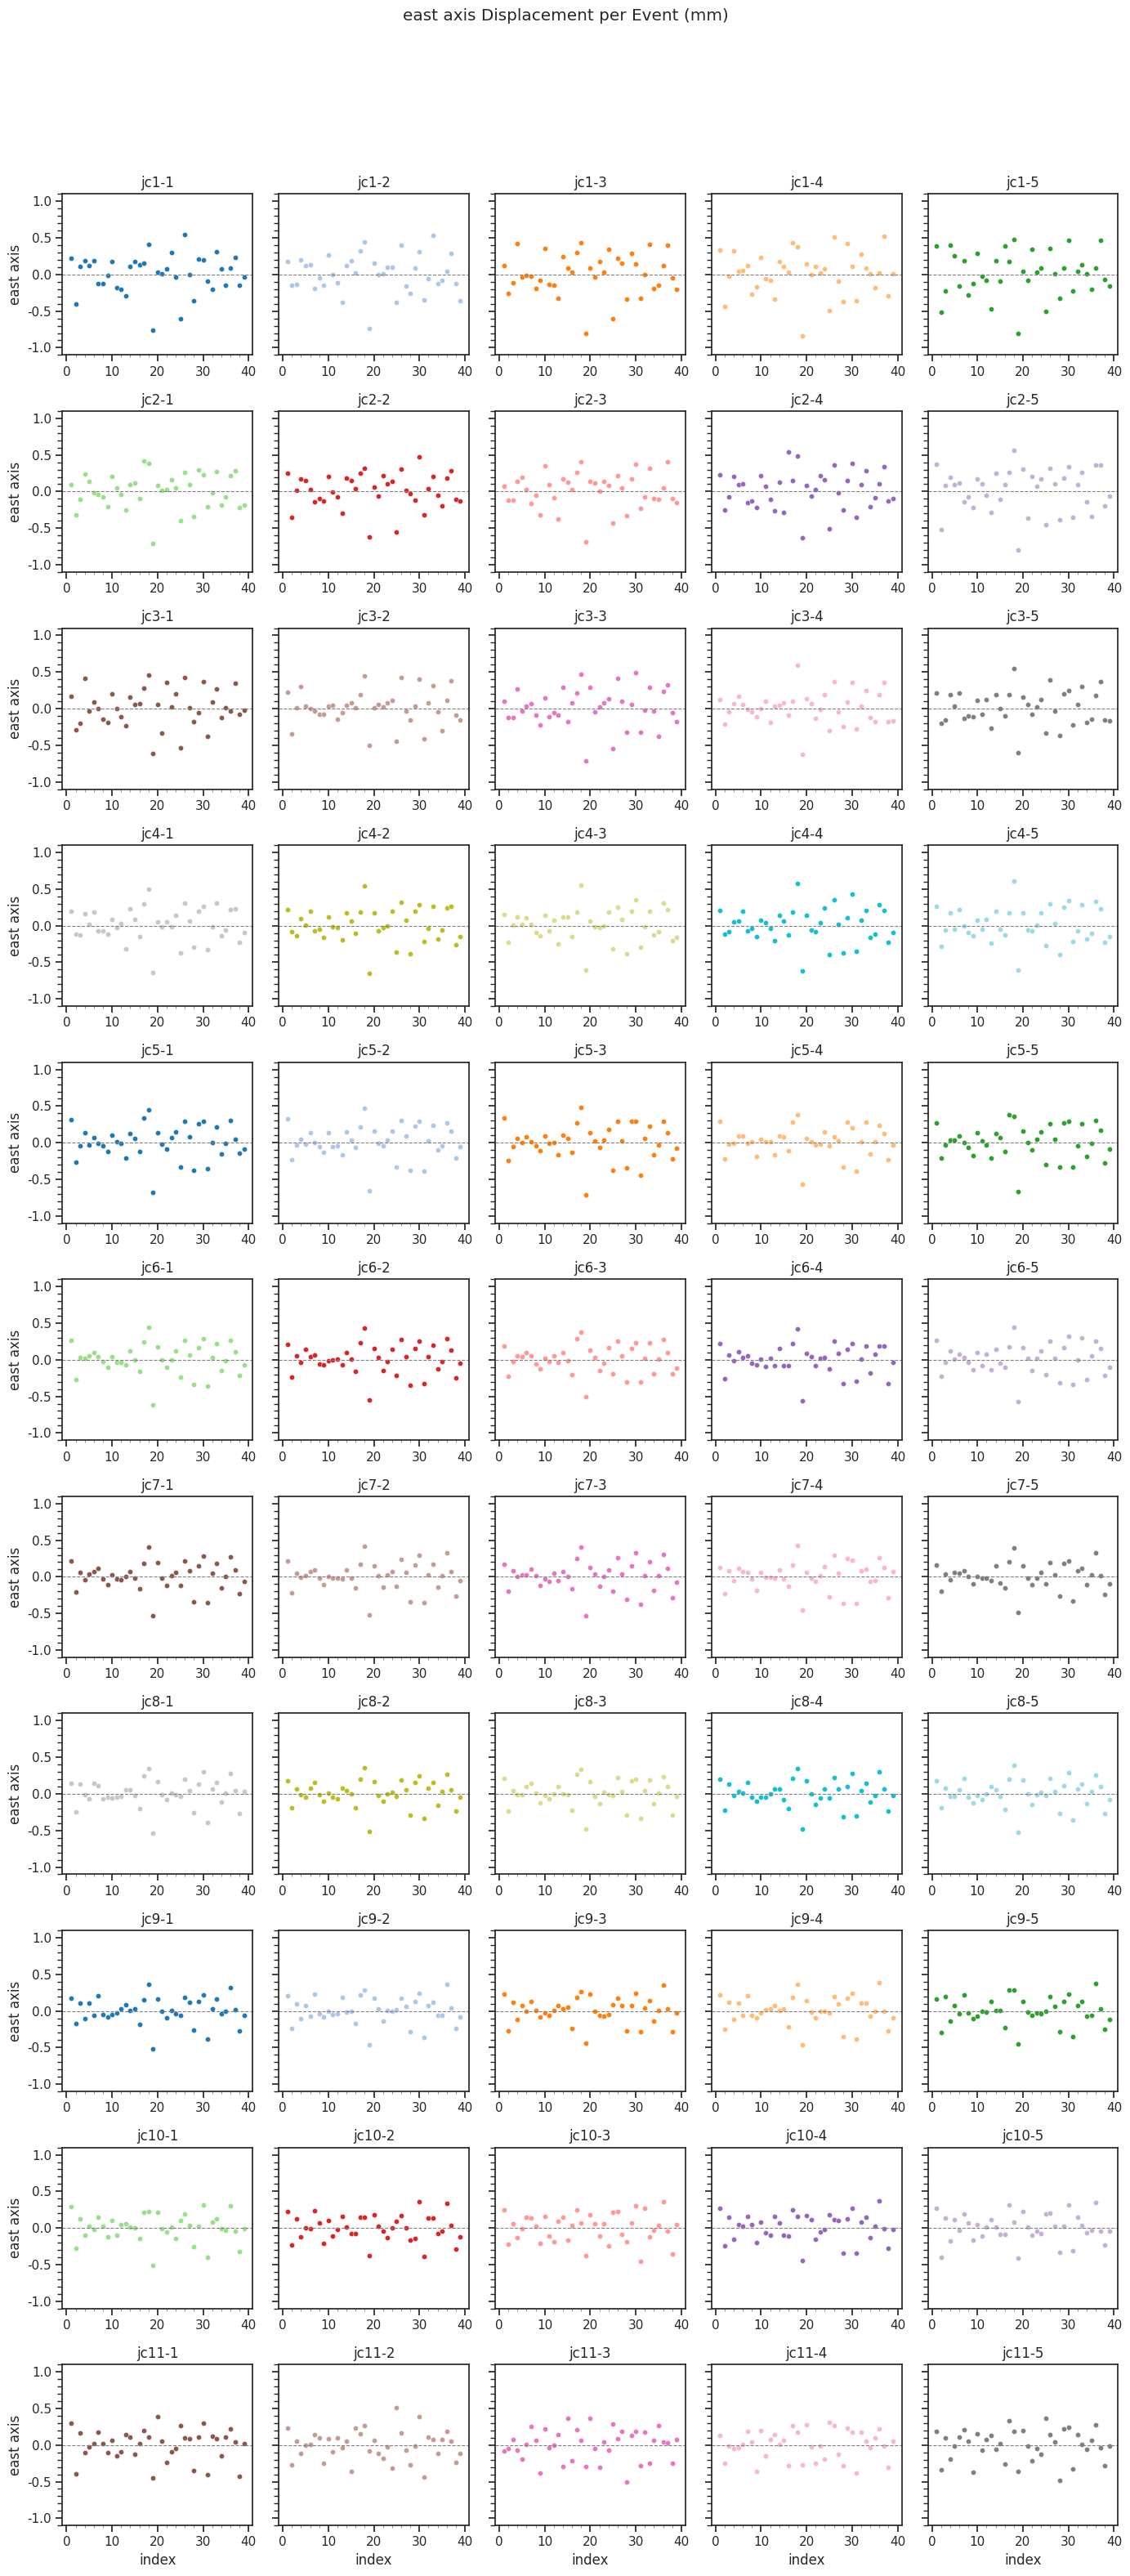

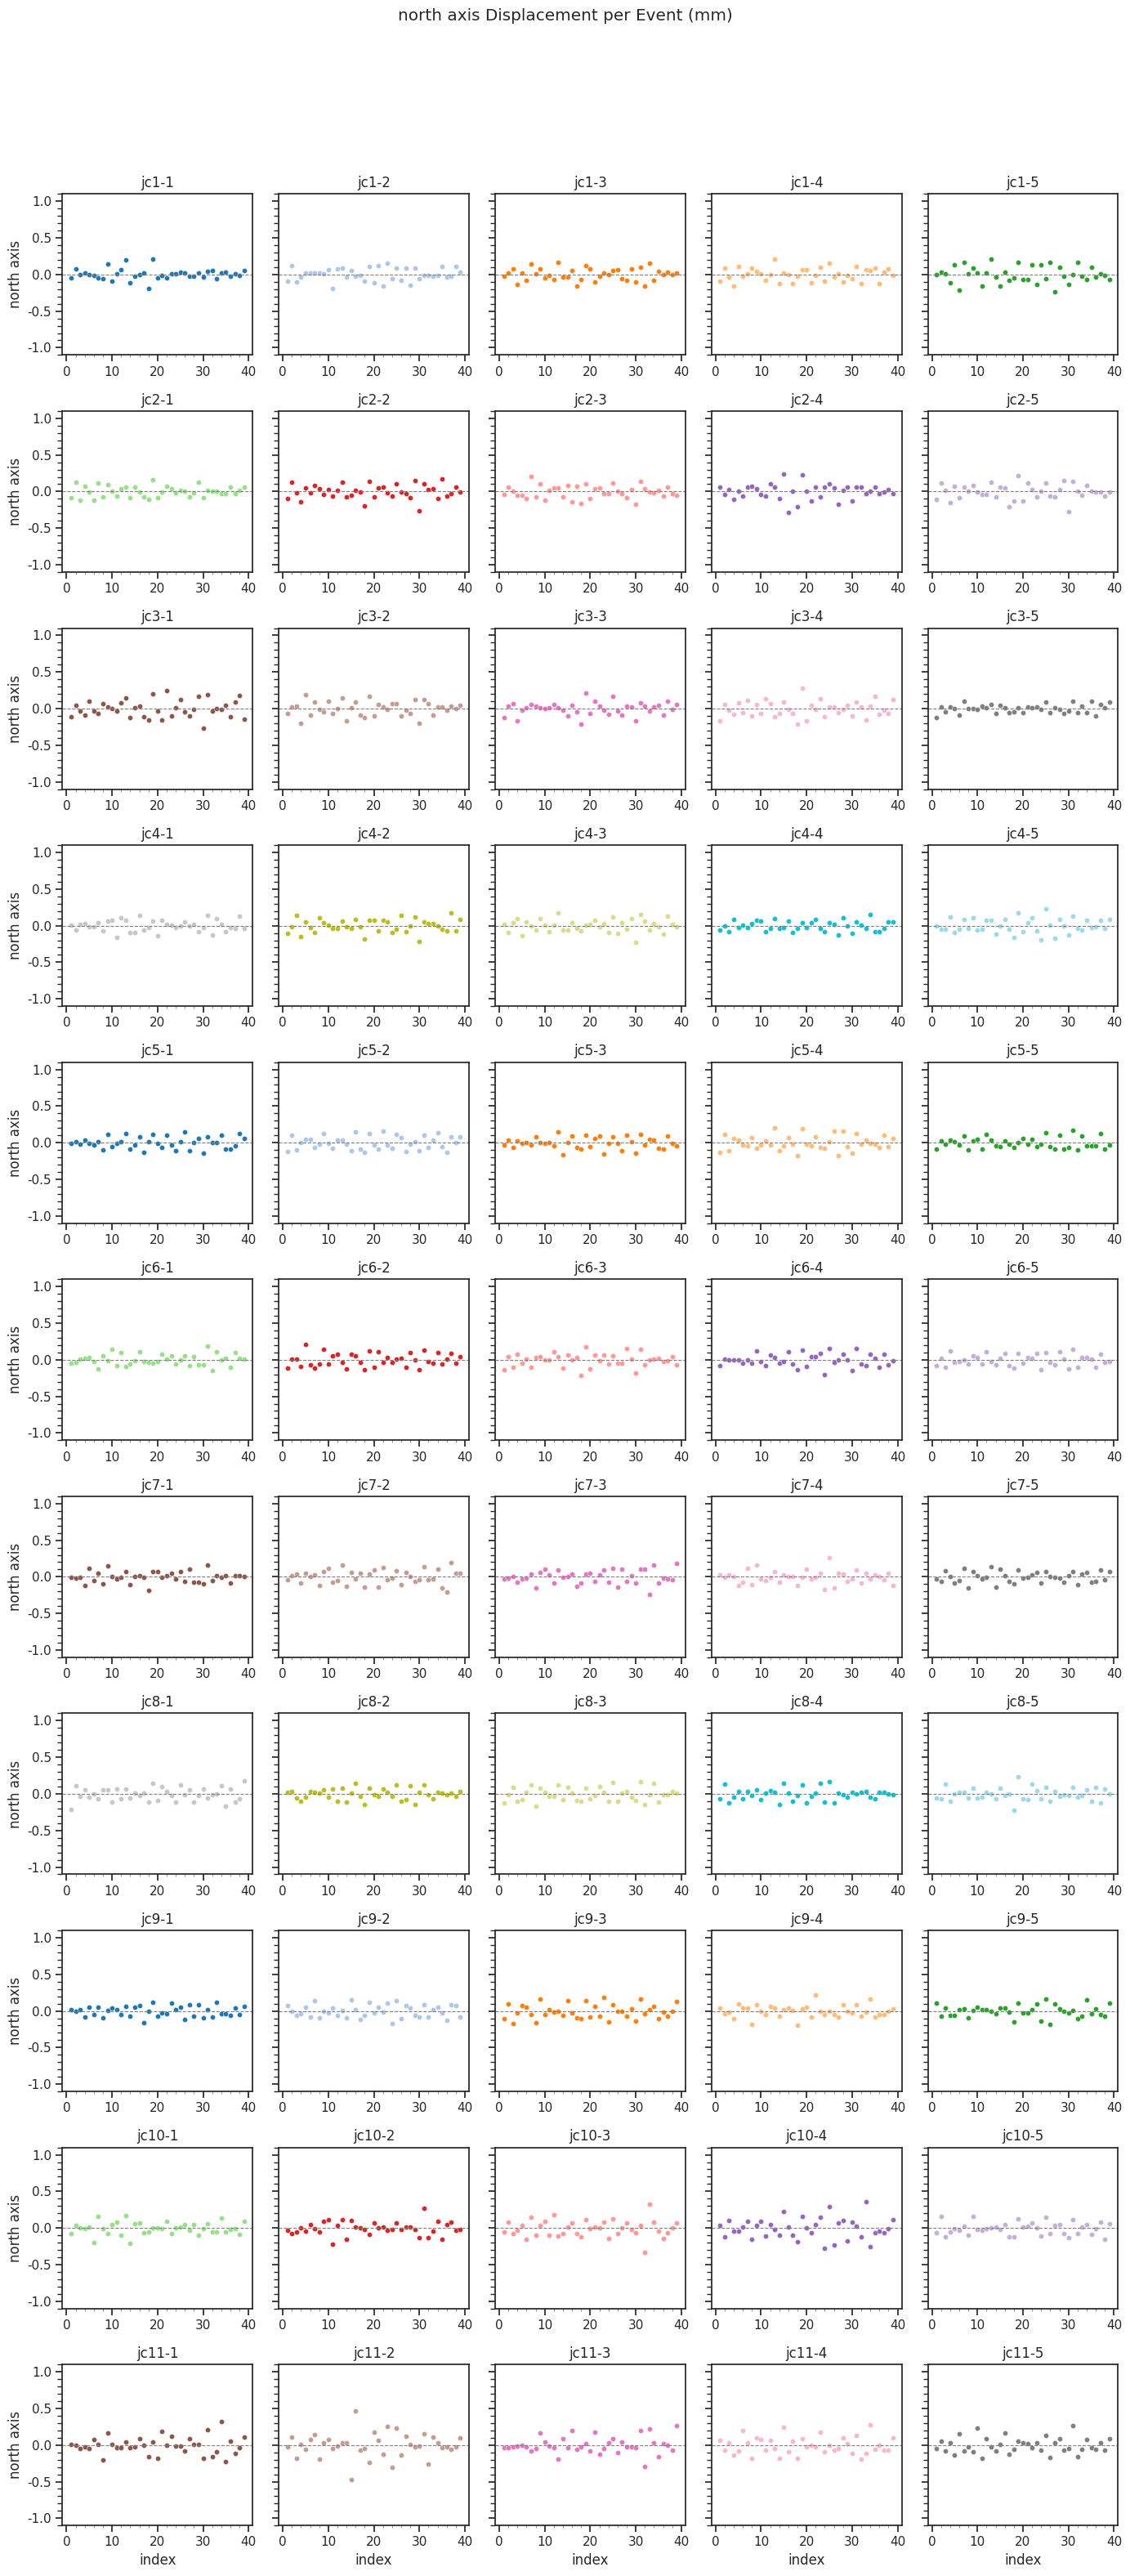

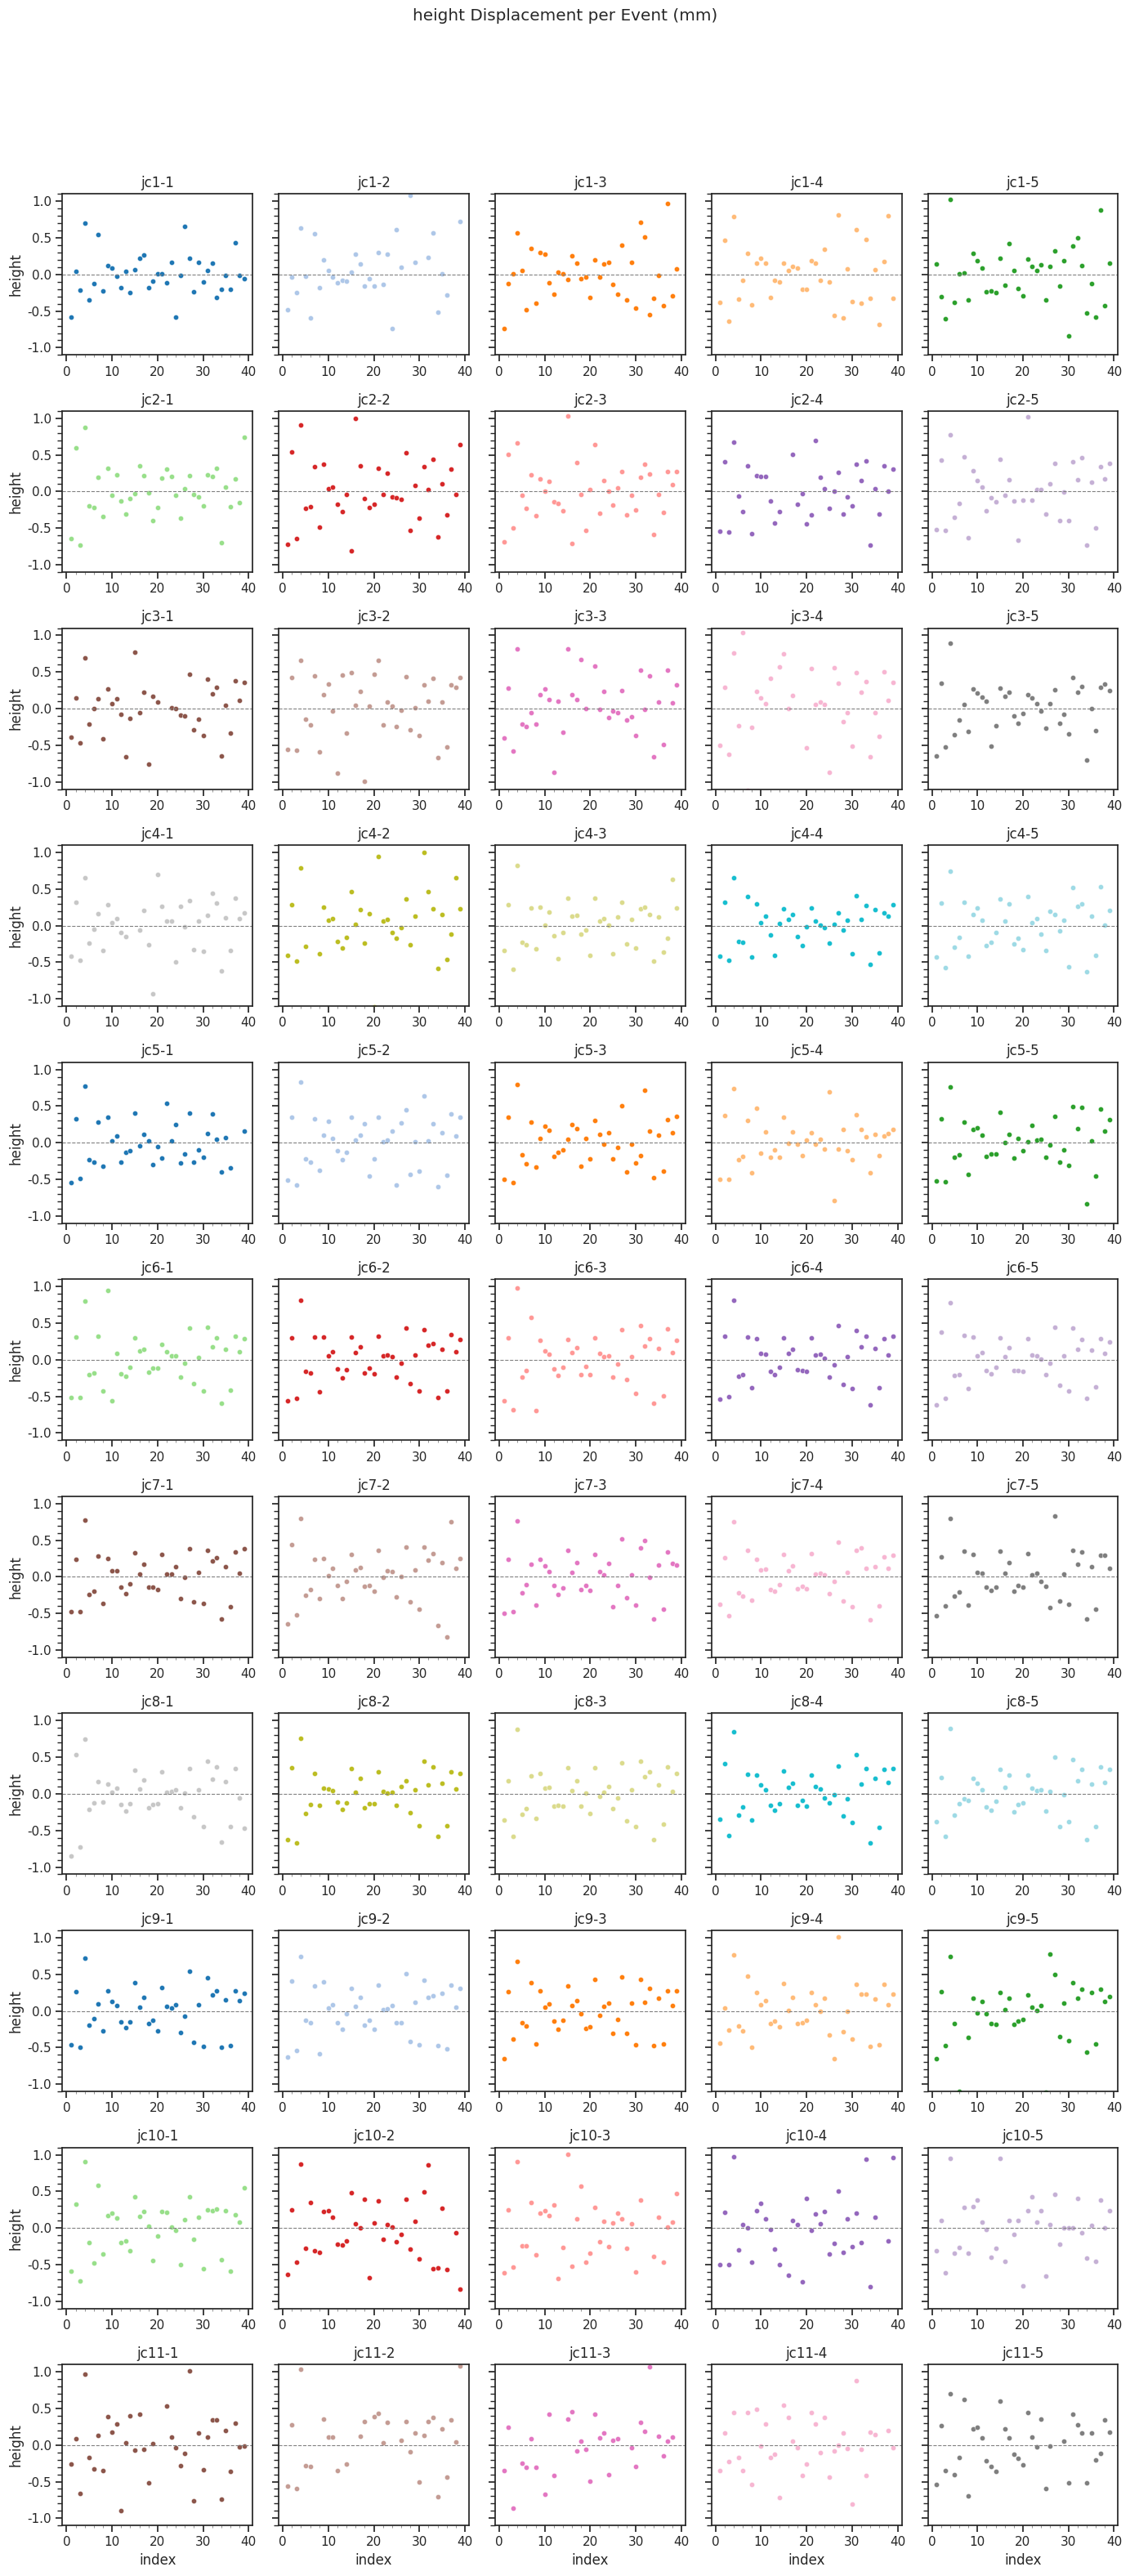

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# 中文字体 & 主题设置
rc = {'axes.unicode_minus': False}
sns.set_theme(context='notebook', style='ticks', rc=rc)

# 1. 读数据 & 过滤

table = df.rename(columns={'东单次变形量(mm)': 'east axis',
                   '北单次变形量(mm)': 'north axis',
                   '高程单次变形量(mm)': 'height',
                   '测点编号': 'point No'})

jc_list = list(table['point No'].drop_duplicates(keep='first').tolist())


# 2. 子图，共用坐标轴
palette = sns.color_palette('tab20', n_colors=len(jc_list))
for col, name in zip(['east axis', 'north axis', 'height'] ,['东单次变形量(mm)', '北单次变形量(mm)', '高程单次变形量(mm)']):
    fig, axes = plt.subplots(
                        nrows=11, ncols=5,
                        sharex='all',
                        sharey='all',
                        figsize=(14, 30)        # 宽度 14 英寸，高度 30 英寸
                    )
    axes = axes.flatten()  #
    for ax, jc in zip(axes, jc_list):
        sns.scatterplot(data=table[table['point No'] == jc],
                        x='index',
                        y=col,
                        color=palette[jc_list.index(jc)],  # 一主题一色
                        s=20,
                        edgecolor='w',
                        linewidth=.3,
                        ax=ax)
        ax.axhline(0, color='grey', lw=0.8, ls='--')
        ax.set_yticks([1, 0.5, 0, -0.5, -1])
        ax.set_ylim(-1.1, 1.1)  
        ax.set_title(jc)          # 子图标题
        ax.legend().remove()      # 去掉重复图例

        ax.xaxis.set_tick_params(which='major', labelbottom=True)
        ax.minorticks_on()
        # ax.xaxis.set_minor_locator(plt.AutoMinorLocator(5))
        ax.tick_params(axis='x', which='minor', length=2, width=0.6, color='grey')
    
    # 3. 全局标题 & 保存
    fig.suptitle(f'{col} Displacement per Event (mm)', y=1.05)
    plt.tight_layout()
    # plt.savefig(f'{name}散点图', dpi=300, bbox_inches='tight')
    plt.show()

In [33]:
df

,测点编号,东坐标,东单次变形量(mm),东累计变形量(mm),北坐标,北单次变形量(mm),北累计变形量(mm),高程,高程单次变形量(mm),高程累计变形量(mm),采集时间,index
0,jc1-1,-8.250412,-1.079313,-0.705834,-55.176856,-1.699384,-1.527354,0.619519,-0.720123,-0.468756,06-23 02:44:56,1
1,jc1-1,-8.250308,0.103883,-0.601951,-55.176858,-0.002116,-1.529470,0.619408,-0.111278,-0.580034,06-23 06:43:43,2
2,jc1-1,-8.250322,-0.013138,-0.615088,-55.176866,-0.008260,-1.537730,0.619484,0.076029,-0.504005,06-23 10:44:49,3
3,jc1-1,-8.249904,0.417903,-0.197185,-55.176940,-0.073863,-1.611593,0.619580,0.095900,-0.408105,06-23 14:43:40,4
4,jc1-1,-8.250191,-0.287087,-0.484272,-55.176868,0.071846,-1.539746,0.618457,-1.122957,-1.531062,06-23 18:44:36,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2305,jc11-5,0.508312,0.362370,0.444939,43.626295,-0.023508,1.236611,-0.060516,-0.346873,-0.791417,06-29 06:43:41,38
2306,jc11-5,0.508049,-0.263589,0.181350,43.626181,-0.114474,1.122137,-0.060348,0.167544,-0.623872,06-29 10:44:33,39
2307,jc11-5,0.508150,0.101580,0.282930,43.626320,0.138945,1.261083,-0.060383,-0.034605,-0.658477,06-29 14:44:33,40
2308,jc11-5,0.507990,-0.160096,0.122834,43.626174,-0.145800,1.115283,-0.060424,-0.040808,-0.699285,06-29 18:44:01,41


In [9]:
tmp = list(df['测点编号'].drop_duplicates(keep='first').tolist())


In [10]:
# 一次性取出并重命名列
dfs = {
    tag: (df.loc[df['测点编号'] == tag, ['东单次变形量(mm)', '北单次变形量(mm)', '高程单次变形量(mm)']]
         .reset_index(drop=True)  
        .rename(columns=lambda c: f'{c}_{tag}'))
    for tag in tmp
}

# 按列合并（横向拼接）
corr_df = pd.concat(dfs.values(), axis=1)

In [11]:
pd.set_option('display.max_columns', None)

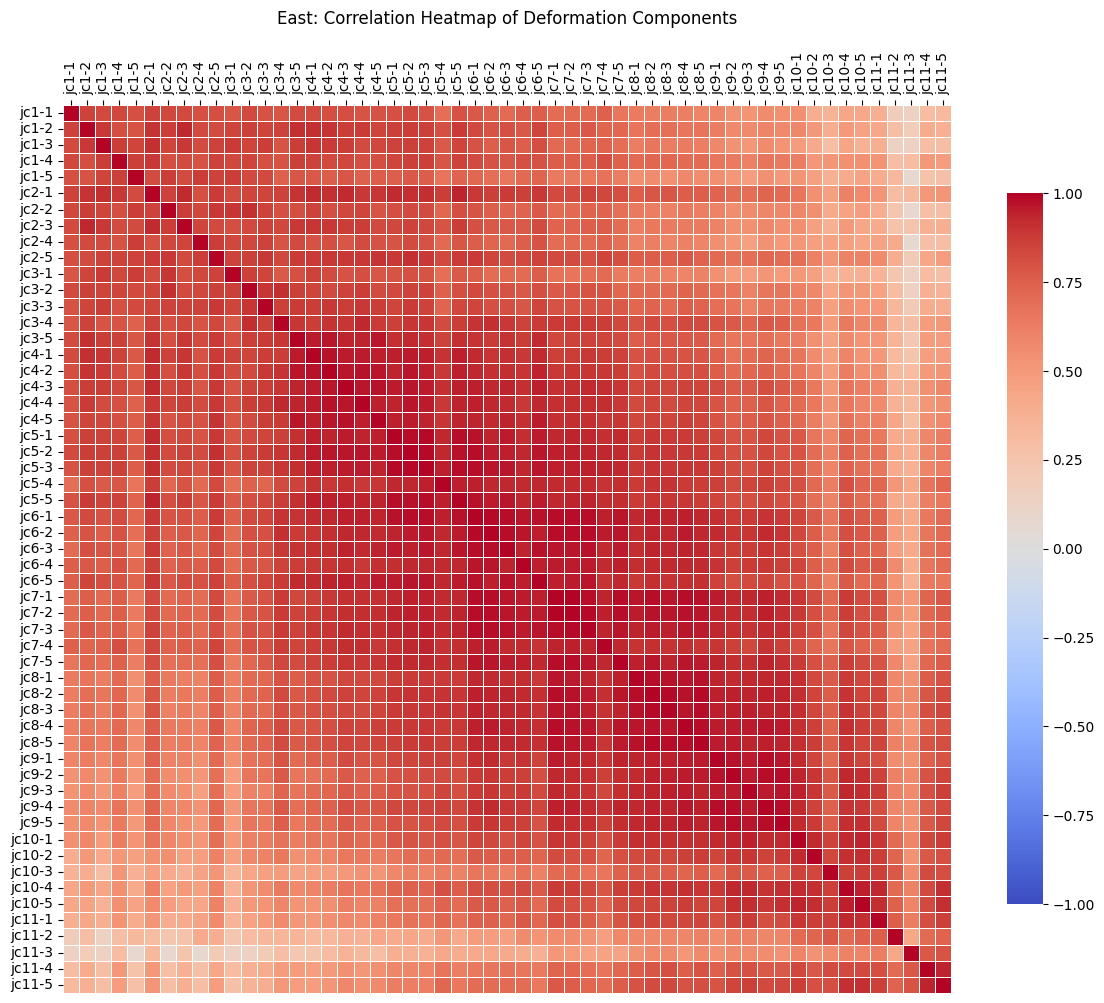

In [16]:
name = '东单次变形量(mm)_'
corr_cols = [name + i for i in tmp]
corr_mat = corr_df[corr_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(
    corr_mat,
    annot=False,
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    xticklabels=tmp,   # 需要显示的标签
    yticklabels=tmp,
        vmin=-1,           # ← 统一刻度
    vmax=1,
    ax=ax
)

# 关键：把 x 轴整体移到顶部
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(axis='x', top=True, bottom=False,rotation=90,
               labeltop=True, labelbottom=False)

plt.title('East: Correlation Heatmap of Deformation Components', pad=20)
plt.tight_layout()

plt.savefig(f'{name}热力图', dpi=300, bbox_inches='tight')
plt.show()


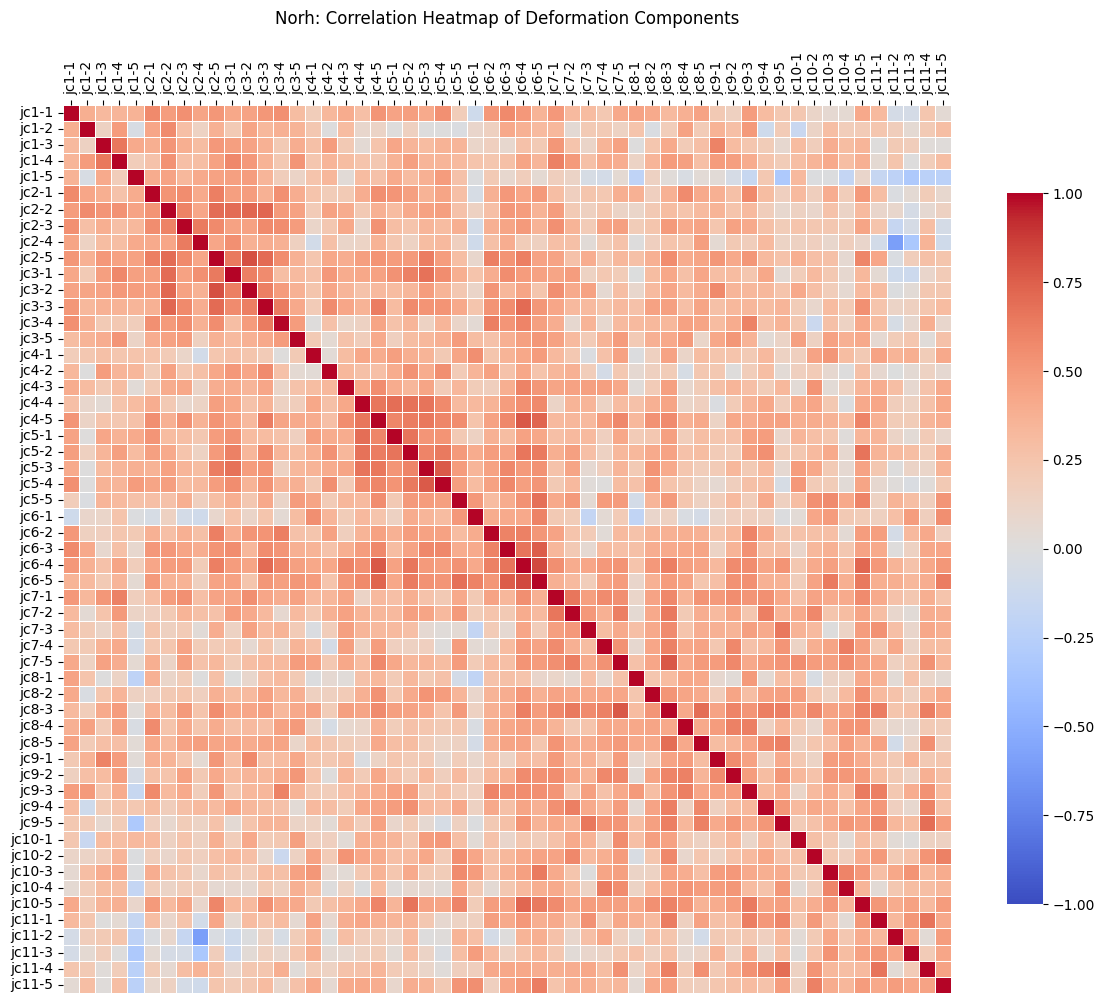

In [17]:
name = '北单次变形量(mm)_'
corr_cols = [name + i for i in tmp]
corr_mat = corr_df[corr_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(
    corr_mat,
    annot=False,
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    xticklabels=tmp,   # 需要显示的标签
    yticklabels=tmp,
        vmin=-1,           # ← 统一刻度
    vmax=1,
    ax=ax
)

# 关键：把 x 轴整体移到顶部
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(axis='x', top=True, bottom=False,rotation=90,
               labeltop=True, labelbottom=False)

plt.title('Norh: Correlation Heatmap of Deformation Components', pad=20)
plt.tight_layout()

plt.savefig(f'{name}热力图', dpi=300, bbox_inches='tight')
plt.show()

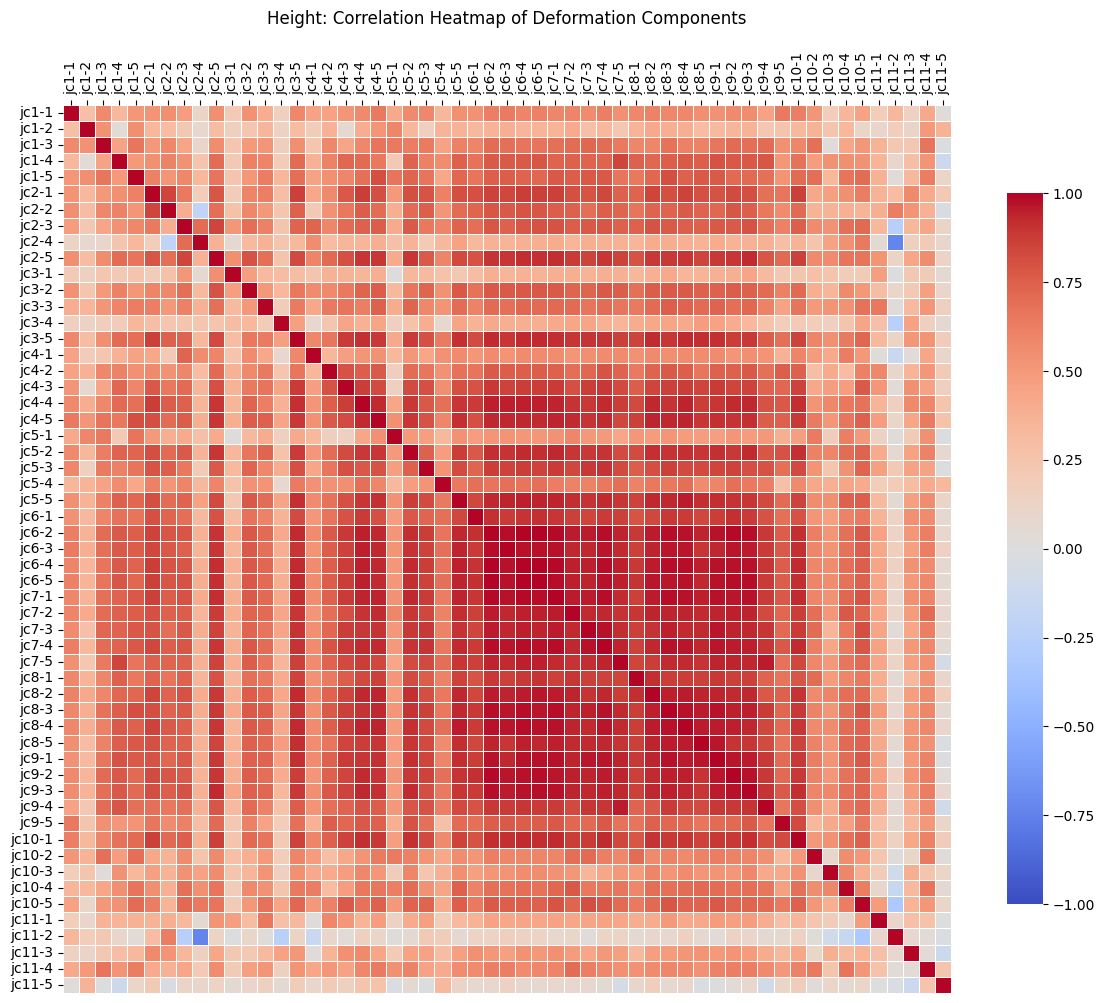

In [18]:
name = '高程单次变形量(mm)_'
corr_cols = [name + i for i in tmp]
corr_mat = corr_df[corr_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(
    corr_mat,
    annot=False,
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    xticklabels=tmp,   # 需要显示的标签
    yticklabels=tmp,
        vmin=-1,           # ← 统一刻度
    vmax=1,
    ax=ax
)

# 关键：把 x 轴整体移到顶部
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(axis='x', top=True, bottom=False,rotation=90,
               labeltop=True, labelbottom=False)

plt.title('Height: Correlation Heatmap of Deformation Components', pad=20)
plt.savefig(f'{name}热力图', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()